# Object Oriented Programming

* Classes have both data and functions
* Used to organize related data and functions in one place
* Provides a way to modularize code

#  How do objects and classes relate?

Objects are to classes as cookies are to cookie cutters. Instances are objects of a particular class.

![classes objects and instances](./images/classes-objects-and-instances.jpg)

cite: https://www.google.com/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwiR7tzSptvaAhUFw4MKHe6TDC4QjRx6BAgAEAU&url=https%3A%2F%2Fwww.wayfair.com%2Fkitchen-tabletop%2Fpdp%2Fcake-boss-26-piece-stainless-steel-alphabet-fondant-cookie-cutter-set-bqss1517.html&psig=AOvVaw2brg-fv0zDhu0684Ar9Hom&ust=1524947591228289

# Programming Language Types
+ **Imperative**
    - Examples: C, R
    - Sequences of steps like a recipe (How)
    - Variables and functions -> Provides modularity through functions
    
+ **Functional**
    - Examples: Clojure, Erlang 
    - Uses results returned by functions only
    - Functions but NO variables -> Allows programs to be easily run on multipl CPUs
    
+ **Declarative**
    - Examples: SQL 
    - Describe what you want, not how to do it (What)
    - Statements constructed of built in functions -> Just give me the answer
    
+ **Object Oriented**
    - Examples: Scala, Python
    - Message passing between objects representing aspects of the problem space
    - Functions and variables contained in objects -> Provides a higher level of modularity
    

# What does OO code look like and how do you use it
code - Showing relationships between classes

Here we will use the Python graphviz package to draw a graph showing relationships between a few different types of musical instruments.  

Here we are showing the inheritence relationships between classes.

Classes with arrow pointing toward them are super or parent classes.  Those with emminating arrows are derived or child classes.  Derived classes have all the functionality of their parent, plus they can add their own too.  


In [1]:
# Let's represent a possible instrument class hierarchy
# Making it meta let's also use an OO graphviz package 
# FIRST: conda install graphviz python-graphviz
from graphviz import Digraph
import tempfile

# LATER: create an instance of the digraph class
# DAG == Directed Acyclic Graph
dag = Digraph(comment='classes of instruments')

# AFTER THAT: dynamically add a data member to flip the graph 
# ignore this code for now
dag.attr(rankdir='BT')

# NEXT: create nodes by calling the node method on the dot object
# think of methods as functions that belongs to an object
# an object is an instance of a class
dag.node('I', 'Instrument')
dag.node('B', 'Brass')
dag.node('T', 'Trumpet')
dag.node('F', 'French Horn')
dag.node('S', 'String')
dag.node('G', 'Electic Guitar')

# THEN: create the edges linking the nodes
dag.edges(['BI', 'TB', 'FB', 'SI', 'GS'])

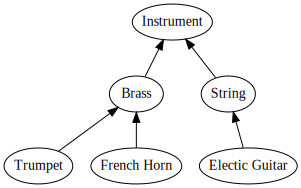

In [2]:
# FINALLY: display the graph
dag

# Shapes as an Example of Object Oriented Programming

Let's say you need to write a program that represents shapes

In [3]:
# Starting with a barebones Circle class
# Class names in Python use the CapWords convention (see https://www.python.org/dev/peps/pep-0008/#class-names)
class Circle:
    pass

In [4]:
# Creating an instance of the class, or instantiation of a class in OO parlance
circ = Circle()
type(circ)

__main__.Circle

In [5]:
# The math package has many functions and constants
import math

# Now, let's use that functionality to add an area method
class Circle:

    def __init__(self, radius):
        '''initialize data values belonging to the object'''
        self.radius = radius
        
    def area(self):
        '''return the area of a circle'''
        return math.pi * self.radius ** 2
    
# self is a reference to an instance of the circle object

In [6]:
# Create two cirlce instances
circ_small = Circle(2)
circ_large = Circle(5.5)

# call the area method and pass the return value to print
print(circ_small.area())
print(circ_large.area())

12.566370614359172
95.03317777109125


In [7]:
# Now let's add a square class
class Square:
    def __init__(self, side):
        self.side = side
        
    def area(self):
        return self.side ** 2

In [8]:
# Create a square
square_tiny = Square(.5)
square_huge = Square(100)

In [9]:
print('tiny', square_tiny.area())
print('huge', square_huge.area())

tiny 0.25
huge 10000


# ... but we want to see the shapes

Code evolves as new uses are needed.  For our shape example, lets add a basic display capablity. Here is the approach we will take:

1. Proof of capability:  Determine how to render shapes in the notenbook and demostrate that it can be done.

2. Adapt our existing code to the task

3. Prove the new capability works

## Proof of Capability

In [10]:
# Jupyter notebook runs in a browser, so it can render HTML code with the help of the IPython package
# 1. Proof of capability for cirlces 
from IPython.display import display, HTML
circle_as_html = '<svg height="100" width="100"><circle cx="50" cy="50" r="40" stroke="black" stroke-width="3" fill="red" /></svg>'
display(HTML(circle_as_html))

In [11]:
# 1. Proof of capability for squares and rectagles
square_as_html = '<svg height="100" width="100"><rect x="25" y="25" width="50" height="50" stroke="orange" stroke-width="3" fill="blue" /></svg'
display(HTML(square_as_html))

In [12]:
# 1. Proof of concept for rendering multiple shapes
square_svg = '<rect x="25" y="25" width="50" height="50" stroke="orange" stroke-width="3" fill="blue" />'
circ_svg = '<circle cx="150" cy="75" r="40" stroke="black" stroke-width="3" fill="red" />'
shapes = '<svg height="150" width="200">' + square_svg + circ_svg + '</svg>'
display(HTML(shapes))

## Plan for Adapting the Code

1. Create a shape base class so that common functionality is contained in one place (per the DRY principle)

2. Enable a shape objects to be positioned on the screen using x, y coordinates and to have colors

3. Add the method to return the shape as an HTML string

4. Write a shape renderer function that takes shapes and plots them

# The DRY Principal == Don't Repeat Yourself

* Idea
    - Behaviors should be implemented in one place
    - Fix it once and be done
* How is accomplished?
    - By containing the behavior in a function or a class
* Try applying DRY with improves code
* Fundamental principle of software engineering

# Adapting the code and showing it works

In [13]:
# Make the base class
import math

class Shape:
    def __init__(self, x, y, color):
        self.x = x
        self.y = y
        self.color = color

        
# Circle inherits from shape
# Now we say that "circle is a shape"
class Circle(Shape):
    def __init__(self, x, y, color, radius):
        # call the initializer for Shape that is refered to as the base or "super" class
        super().__init__(x, y, color)
        # set the radius data member of the Circle object
        self.radius = radius
        
    def area(self):
        return math.pi * self.radius ** 2
    
    def renderable(self):
        # f-strings allow values to be easily injected into strings
        return f'<circle cx="{self.x}" cy="{self.y}" r="{self.radius}" stroke="black" stroke-width="3" fill="{self.color}" />'

    
class Square(Shape):
    def __init__(self, x, y, color, side):
        super().__init__(x, y, color)
        self.side = side
        
    def area(self):
        return self.side ** 2    
    
    def renderable(self):
        return f'<rect x="{self.x}" y="{self.y}" width="{self.side}" height="{self.side}" stroke="orange" stroke-width="3" fill="{self.color}" />'

    
def render(shapes):
    shapes_str = ''
    # interate over the list of shapes
    for shape in shapes:
        # concatenate each shapes renderable string to the string
       shapes_str += shape.renderable()
    # wrap the list of shapes in an svg statement
    html_to_render = '<svg height="200" width="200">' + shapes_str + '</svg>'
    display(HTML(html_to_render))


def main():
    # create the shapes
    sqr_1 = Square(x=150, y=50, color='darkred', side=45)
    sqr_2 = Square(x=50, y=150, color='yellow', side=25)
    crc_1 = Circle(x=100, y=100, color='olivedrab', radius=50)
    crc_2 = Circle(x=125, y=125, color='cornflowerblue', radius=35)
    
    # put them in a list
    shapes = [sqr_1, sqr_2, crc_1, crc_2]
    # pass them to the render function
    render(shapes)

    
# This kicks it all off
main()        